In [2]:
risk_map = {'Low': 0, 'Medium': 1, 'High': 2}
dataset['Thyroid_Cancer_Risk'] = dataset['Thyroid_Cancer_Risk'].map(risk_map)
dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)
dataset

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Gender_Male,Country_China,Country_Germany,Country_India,...,Country_South Korea,Country_UK,Country_USA,Family_History_Yes,Radiation_Exposure_Yes,Iodine_Deficiency_Yes,Smoking_Yes,Obesity_Yes,Diabetes_Yes,Diagnosis_Malignant
0,66,9.37,1.67,6.16,1.08,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,29,1.83,1.73,10.54,4.05,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,86,6.26,2.59,10.57,4.61,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75,4.10,2.62,11.04,2.46,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,35,9.10,2.11,10.71,2.11,2,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,2.00,0.64,11.92,1.48,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212687,89,9.77,3.25,7.30,4.46,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
212688,72,7.72,2.44,8.71,2.36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
212689,85,5.62,2.53,9.62,1.54,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
dataset.to_csv("thyroid_cancer_risk_encoded.csv", index=False)

In [4]:
# Input & Output datasets
indep=dataset[["Thyroid_Cancer_Risk","TSH_Level","T4_Level","Nodule_Size","T3_Level"]]
dep=dataset["Diagnosis_Malignant"]
indep

0         0
1         0
2         0
3         0
4         0
         ..
212686    0
212687    0
212688    0
212689    0
212690    1
Name: Diagnosis_Malignant, Length: 212691, dtype: int32

In [5]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0) 

In [6]:
# Build and Train Random Forest Model

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [7]:
# Make Predictions
y_pred = classifier.predict(X_test)

In [8]:
# Evaluate Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


✅ Random Forest Accuracy: 0.8249

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     54452
           1       0.70      0.44      0.54     16445

    accuracy                           0.82     70897
   macro avg       0.77      0.69      0.71     70897
weighted avg       0.81      0.82      0.81     70897



In [9]:
import matplotlib.pyplot as plt
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[51316  3136]
 [ 9281  7164]]


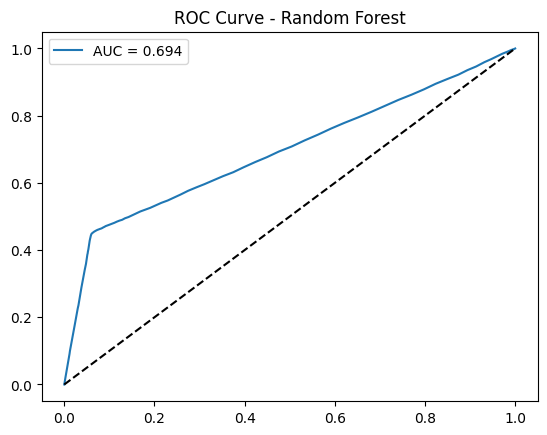

In [10]:
from sklearn.metrics import auc
# ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("ROC Curve - Random Forest")
plt.show()

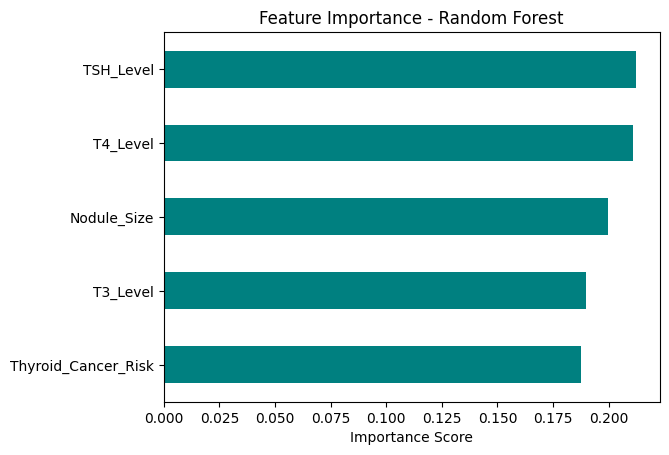

In [11]:
# Feature Importance Plot
# -------------------------
importances = pd.Series(classifier.feature_importances_, index= ['Thyroid_Cancer_Risk', 'TSH_Level', 'T4_Level', 'Nodule_Size', 'T3_Level'])
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

# Saving the Trained final model

In [19]:
import pickle

filename="final_thyroid_cancer_risk_model.sav"
pickle.dump(classifier,open(filename,'wb')) 


In [12]:
# -----------------------------------
# Hyperparameter Tuning for Random Forest
# -----------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all CPU cores
    verbose=2,
    scoring='roc_auc'   # Optimize for AUC score
)


In [ ]:
# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score (CV):", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [14]:
# Evaluate the best model on test data
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
accuracy = accuracy_score(y_test, y_pred_best)
auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print("\nFinal Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Final Model Evaluation:
Accuracy: 0.8271
AUC Score: 0.6985

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     54452
           1       0.70      0.45      0.55     16445

    accuracy                           0.83     70897
   macro avg       0.77      0.70      0.72     70897
weighted avg       0.81      0.83      0.81     70897



In [17]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Grid Search helped fine-tune the model and resulted in slight improvements in accuracy, AUC score, and performance on the malignant class. 
The improvements are not large, the optimized model is more stable and reliable than the previous version.

# Saving the Model

In [19]:
# best model
print (best_rf)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       random_state=42)


In [21]:
import pickle

pickle.dump(best_rf, open(r"E:\AI Course\Week - 9 - ML and Data Science Capstone\4. Feature Selection & Model Creation/final_thyroid_risk_model.pkl", "wb"))
